In [1]:
import numpy as np
import pickle
from datetime import datetime
from utils import *
import copy
import moviepy.editor as mp

### Create cars

In [2]:
Ncars = 4

# Create car
car1 = CAR([0,0,0,0,0,0,0,0], color='red')
car2 = CAR([0,0,0,0,0,0,0,0], color='purple')
car3 = CAR([0,0,0,0,0,0,0,0], color='blue')
car4 = CAR([0,0,0,0,0,0,0,0], color='green')

start_order = [3,1,2,4]
cars = [eval('car'+str(i)) for i in start_order]

# cars = [CAR(np.random.uniform(0,1,8), color=c) for c in colors]
# cars = cars[:Ncars]

### Create agent

In [3]:
# Select agent
with open('../output/trained_agents', 'rb') as f:
    include_state_vars = pickle.load(f)
    agents = pickle.load(f)
agent = agents[0]

agents = [copy.deepcopy(agent) for _ in range(Ncars)]

### Create circuit

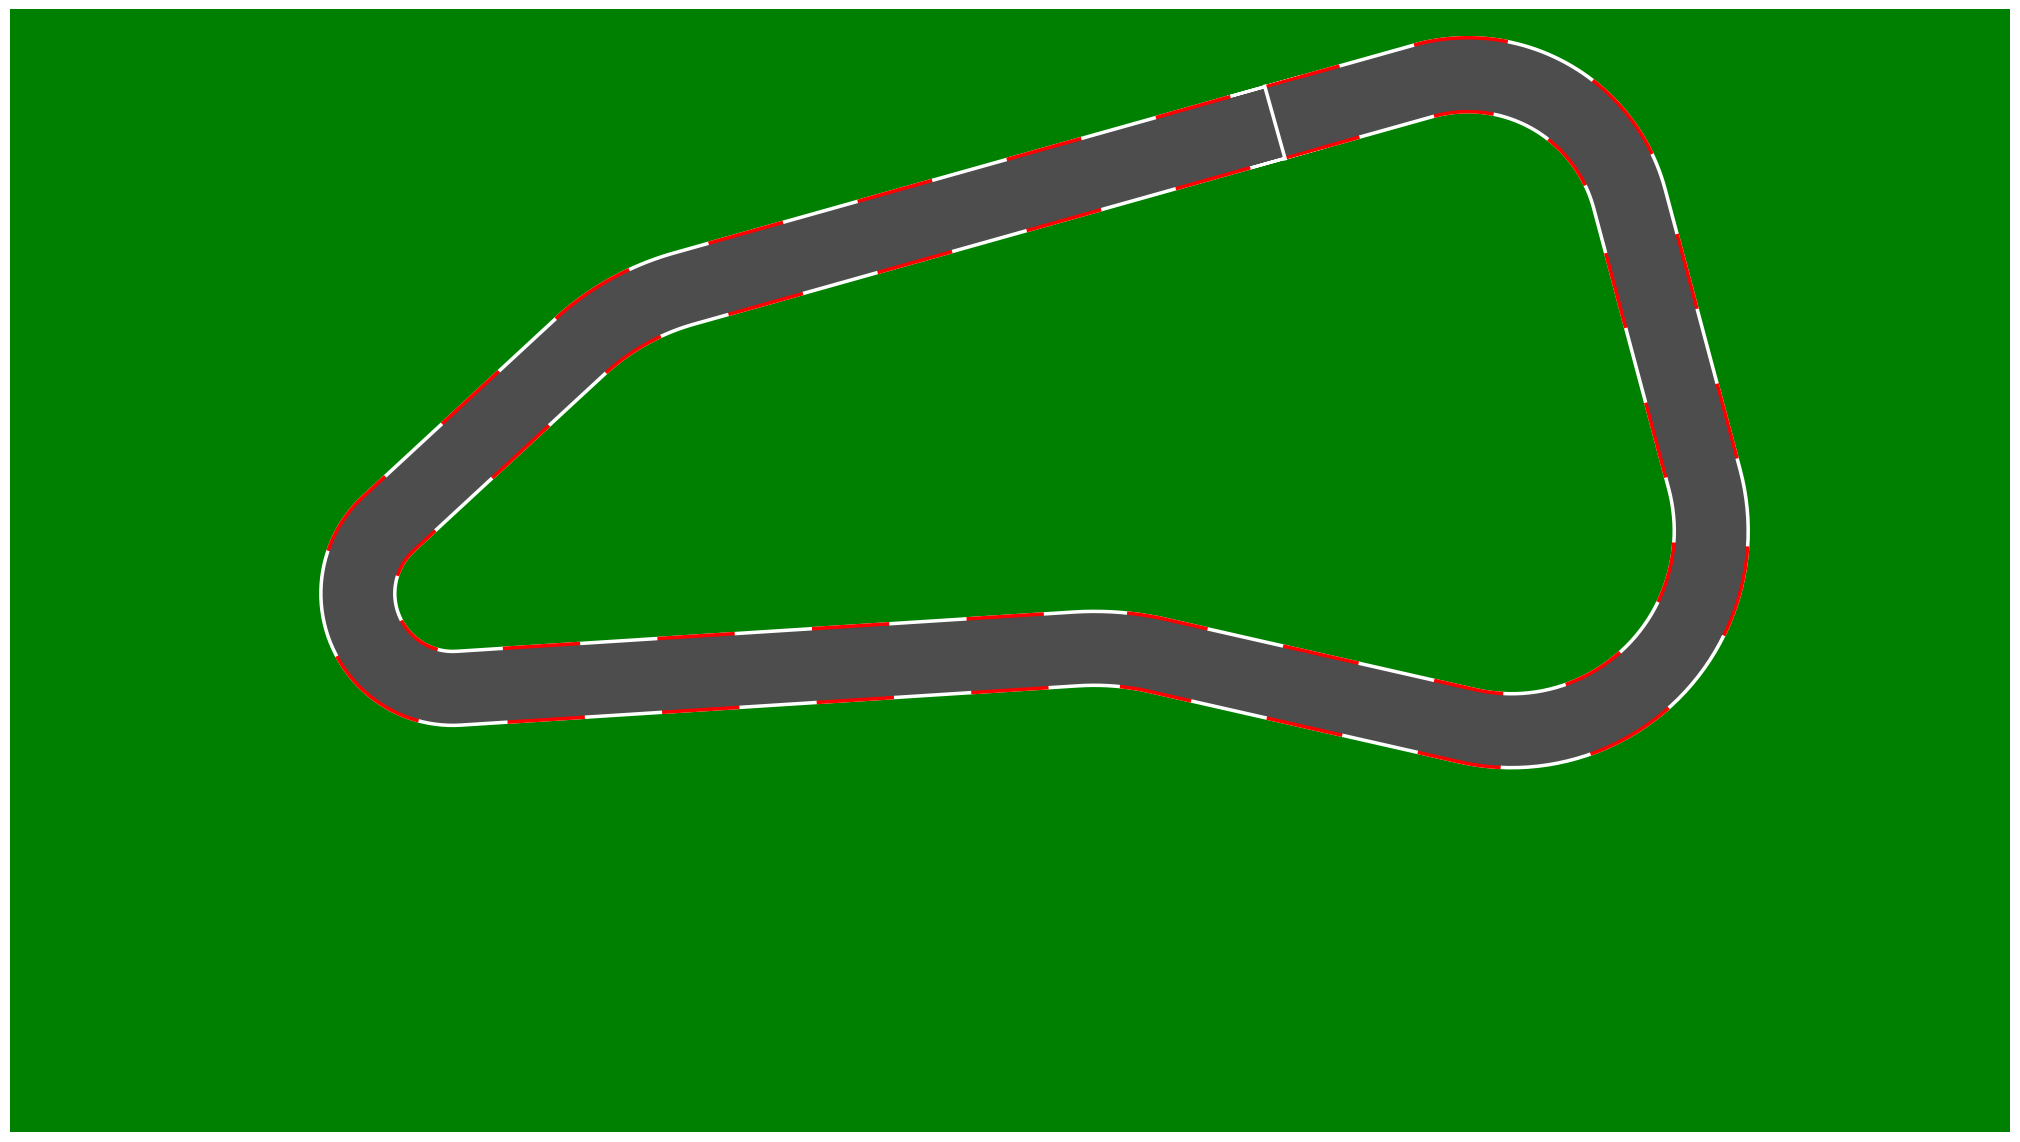

In [4]:
Nsegments_min = 4
Nsegments_max = 10
Nsegments = np.random.randint(Nsegments_min, Nsegments_max)

circuit_diagonal = np.random.uniform(200,350)
# circuit_diagonal = 200

circuit = CIRCUIT(circuit_diagonal=circuit_diagonal, Nsegments=Nsegments)

circuit.plot()
circuit.fig

### Create race

In [5]:
MaxTime = 10*60
race = RACE(circuit=circuit,cars=cars,laps=1,agents=agents,include_state_vars=include_state_vars,MaxTime=MaxTime)

# Define filename
current_datetime = datetime.now()
date_string = current_datetime.strftime("%Y%m%d_%H%M")
filename = date_string + '_test'

# Simulate race and save video
race.simulate(saveas='../output/'+filename+'.mp4')

### Add audio to video

In [6]:
video = mp.VideoFileClip('../output/'+filename+'.mp4')
video_duration = video.duration

audio = mp.AudioFileClip('../graphics/Hard Rock Racing Music.mp3')
# audio = mp.AudioFileClip('../graphics/y2mate.com - COCONUT MALL  Mario Kart Wii METAL.mp3')
# audio = mp.AudioFileClip('../graphics/LifeIsAHighway.mp3')
# audio = mp.AudioFileClip('../graphics/Striker - Full Speed Or No Speed.mp3')
# audio = mp.AudioFileClip('../graphics/ActionBackground.mp3')

audio = audio.subclip(0, video_duration)  # Cut the audio to match the duration of the video

final = video.set_audio(audio)
final.write_videofile('../output/'+filename+'_audio.mp4')
# audio = audio.subclip(0, video.duration)# Cut the audio to the duration of the video

final = video.set_audio(audio)
final.write_videofile('../output/'+filename+'_audio.mp4')

Moviepy - Building video ../output/20240308_1524_test_audio.mp4.
MoviePy - Writing audio in 20240308_1524_test_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ../output/20240308_1524_test_audio.mp4



Moviepy - Done !
Moviepy - video ready ../output/20240308_1524_test_audio.mp4
Moviepy - Building video ../output/20240308_1524_test_audio.mp4.
MoviePy - Writing audio in 20240308_1524_test_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ../output/20240308_1524_test_audio.mp4



Moviepy - Done !
Moviepy - video ready ../output/20240308_1524_test_audio.mp4
